In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1 = cv2.imread('test images/batman.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('test images/bvs.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

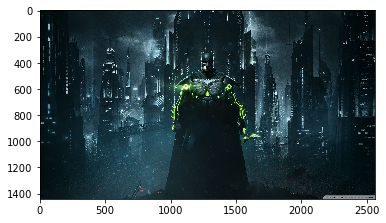

In [3]:
plt.imshow(img1)

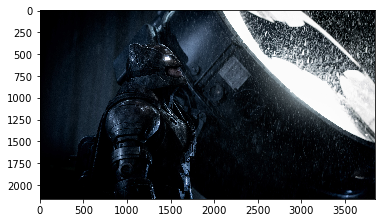

In [4]:
plt.imshow(img2)

In [5]:
img1.shape

(1440, 2560, 3)

In [6]:
img2.shape

(2160, 3840, 3)

In [7]:
# Blendin images of the same size

In [8]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

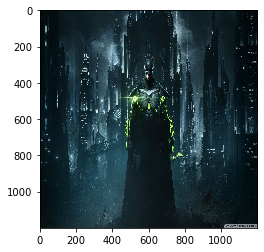

In [9]:
plt.imshow(img1)

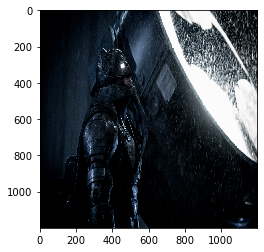

In [10]:
plt.imshow(img2)

In [11]:
blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.1,gamma=0)

## addWeighted function works only if the images are in same size

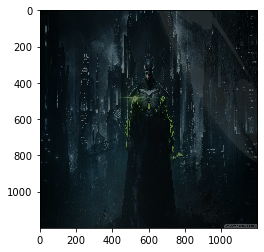

In [12]:
plt.imshow(blended)

In [13]:
# OVERLAY small image on top of a larger image ( no blending)
# Numpy reassignment

In [14]:
img1 = cv2.imread('test images/batman.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('test images/bvs.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [15]:
img1 = cv2.resize(img1,(3000,1750))

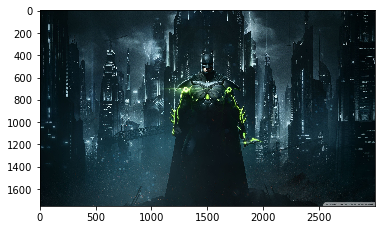

In [16]:
plt.imshow(img1)

In [17]:
large_img = img2
small_img = img1

In [18]:
x_offset = 0
y_offset = 0

In [19]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [20]:
large_img.shape

(2160, 3840, 3)

In [21]:
small_img.shape

(1750, 3000, 3)

In [22]:
large_img[y_offset:y_end,x_offset:x_end,:] = small_img

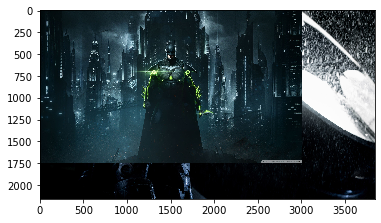

In [24]:
plt.imshow(large_img)

In [25]:
## Blending two images with different sizes

In [26]:
img1 = cv2.imread('test images/naruto.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('test images/bvs.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

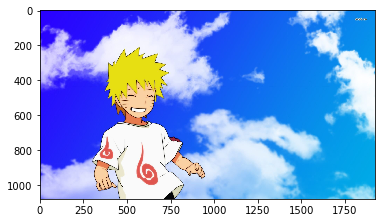

In [27]:
plt.imshow(img1)

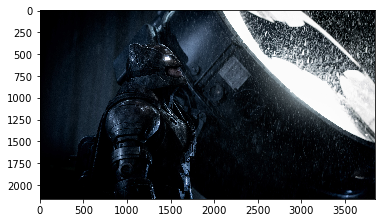

In [28]:
plt.imshow(img2)

In [29]:
larger_image = img2
smaller_image = img1

In [30]:
x_offset = larger_image.shape[1] - smaller_image.shape[1]
y_offset = larger_image.shape[0] - smaller_image.shape[0]
print(larger_image.shape)
print(smaller_image.shape)
print(x_offset,y_offset)

(2160, 3840, 3)
(1080, 1920, 3)
1920 1080


In [31]:
rows,cols,channels = smaller_image.shape

In [32]:
rows

1080

In [33]:
cols

1920

In [34]:
channels

3

In [35]:
# Region of Interest

roi = larger_image[y_offset:larger_image.shape[0],x_offset:larger_image.shape[1]]

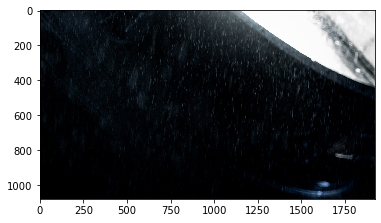

In [36]:
plt.imshow(roi)

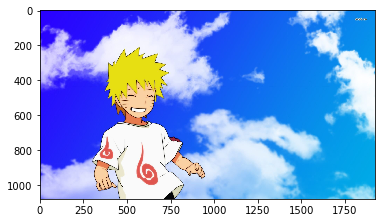

In [58]:
smaller_img_gray = cv2.cvtColor(smaller_image,cv2.COLOR_RGB2GRAY)
plt.imshow(smaller_image)

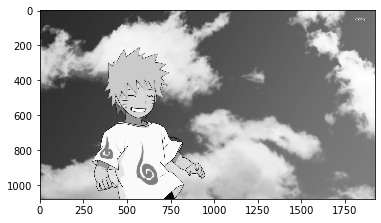

In [59]:
plt.imshow(smaller_img_gray,cmap='gray')

In [60]:
mask_inv = cv2.bitwise_not(smaller_img_gray)

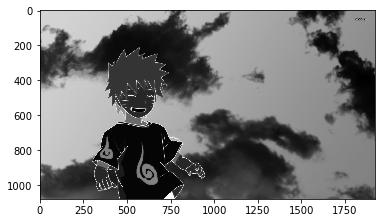

In [62]:
plt.imshow(mask_inv,cmap='gray')

In [41]:
mask_inv.shape

(1080, 1920)

In [52]:
white_background = np.full(smaller_image.shape,255)

In [64]:
# white_background

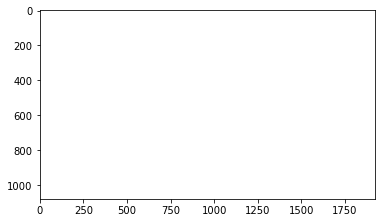

In [54]:
plt.imshow(white_background)

In [66]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [67]:
bk.shape

(1080, 1920, 3)

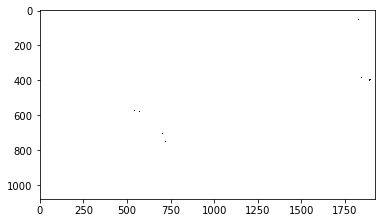

In [68]:
plt.imshow(bk)

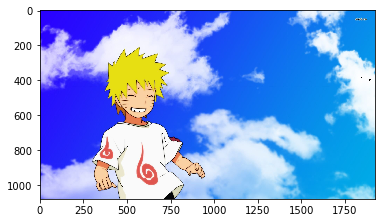

In [80]:
larger_image_gray = cv2.cvtColor(larger_image,cv2.COLOR_RGB2GRAY)
mask_inv2 = cv2.bitwise_not(larger_image_gray)
plt.imshow(mask_inv2,cmap='gray')

fg = cv2.bitwise_or(smaller_image,smaller_image,mask=mask_inv)
plt.imshow(fg)

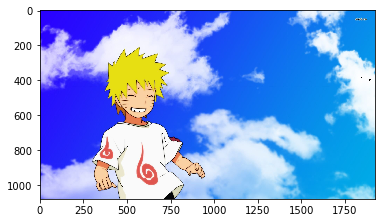

In [74]:
plt.imshow(fg)

In [81]:
final_roi = cv2.bitwise_or(roi,fg)

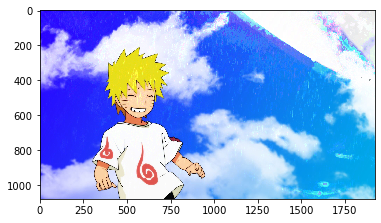

In [82]:
plt.imshow(final_roi)

In [83]:
smaller_image = final_roi

In [88]:
larger_image[y_offset:y_offset+smaller_image.shape[0],x_offset:x_offset+smaller_image.shape[1]] = smaller_image

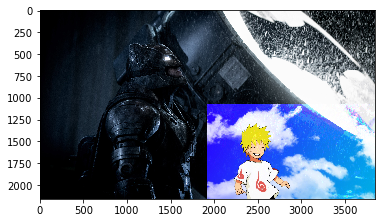

In [89]:
plt.imshow(larger_image)